In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [9]:
# Pick some number of evenly spaced points N
N = 1000
Psi = np.zeros(N)

# Set gamma squared to some value, physical params contained in this
GammaSquare = 200

# Define the dimensionless potential
def nu(xtilde):
    return -1

# Pick some trial dimensionless energy, nrg, which must be greater
# than the minimum of the dimensionless potential, nu
# (see Griffiths Quantum mechanics Problem 2.2)
nrg = -0.9

# Set array of dimensionless x values
xtilde_vals = np.linspace(0, 1, N)

In [10]:
# Define iterative method for solving the Schrodinger equation
def iterative_method(Psi_, k_squared_vals_, N_):
    l_squared = (1/N)**2
    p_vals, q_vals = 1 - (5/12) * l_squared * k_squared_vals_, \
                     1 + (1/12) * l_squared * k_squared_vals_
    for i in range(2, N_):
        Psi_[i] = (2*p_vals[i-1]*Psi_[i-1] - q_vals[i-2]*Psi_[i-2])/q_vals[i]
    return Psi_

[-0.99       -0.96888889 -0.94777778 -0.92666667 -0.90555556 -0.88444444
 -0.86333333 -0.84222222 -0.82111111 -0.8       ]
-0.99
[-0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99
 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -0.99 -

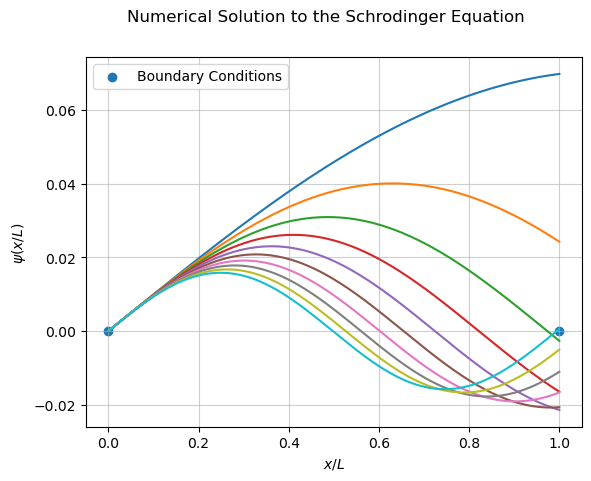

In [11]:
def analysis(Psi_, trial_nrg_, nu_, xtilde_vals_, N_, GammaSquare_, function_name='nu'):

    Psi_list = []
    print(trial_nrg_)

    fig, ax = plt.subplots()
    fig.suptitle('Numerical Solution to the Schrodinger Equation')

    for nrg_ in trial_nrg_:
        print(nrg_)
        Psi_trial = Psi_
        # Set the dimensionless energy array so that calculation is easier.
        nrg_vals = nrg_ * np.ones(N_)
        print(nrg_vals)

        # Calculate the potential and k squared values from the inputted potential.
        # points and energy.
        potential_vals = [nu_(x) for x in xtilde_vals_]
        k_squared_vals = GammaSquare_ * (nrg_vals - potential_vals)

        # For nu=-1, first two points given by
        Psi_trial[0], Psi_trial[1] = 0, 1E-4

        # Calculate the wavefunction from these points.
        Psi_trial = iterative_method(Psi_trial, k_squared_vals, N_)
        ax.plot(xtilde_vals_, Psi_trial)

    ax.scatter((1,0),(0,0),label='Boundary Conditions')
    ax.grid(alpha=0.6)
    ax.set_xlabel('$x/L$')
    ax.set_ylabel('$\\psi(x/L)$')
    ax.legend()

    plt.savefig(f'/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/wavefunc_no_shoot{function_name}.pdf')
    plt.show()
    plt.close()

trial_energies = np.linspace(-0.99,-0.8, 10)
analysis(Psi, trial_energies, nu, xtilde_vals, N, GammaSquare)


def analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_):

    # Set the dimensionless energy array so that calculation is easier.
    nrg_vals = nrg_*np.ones(N_)

    # Calculate the potential and k squared values from the inputted potential.
    # points and energy.
    potential_vals = [nu_(x) for x in xtilde_vals_]
    k_squared_vals = GammaSquare_ * (nrg_vals - potential_vals)

    # For nu=-1, first two points given by
    Psi_[0], Psi_[1] = 0, 1E-4

    # Calculate the wavefunction from these points.
    Psi_ = iterative_method(Psi_, k_squared_vals, N_)
    return Psi_

In [12]:
def Shooting_method(nrg_, nu_, xtilde_vals_, N_, GammaSquare_):
        dnrg = 1E-2
        tolerance = 1E-15

        Psi_ = np.zeros(N_)
        Psi_ = analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_)
        Psi_end_vals = [Psi_[-1]]

        while np.abs(dnrg) > tolerance:
            nrg_ += dnrg
            Psi_prime = analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_)
            Psi_end_vals.append(Psi_prime[-1])
            if Psi_end_vals[-1]*Psi_end_vals[-2] < 0:
                dnrg = -dnrg/2
        return nrg_

In [13]:
energy = Shooting_method(nrg, nu, xtilde_vals, N, GammaSquare)
print(energy)

energy_starting_values = [-0.99, -0.9, -0.6, -0.3, 0.2, 0.5, 1, 2, 2.8, 3.8]


# energy_starting_values = np.linspace(-0.99, 5, 40)
energy_final_values = np.zeros(10)
for i in range(len(energy_starting_values)):
    energy_final_values[i] = Shooting_method(energy_starting_values[i], nu, xtilde_vals, N, GammaSquare)
    print(f'Iteration {i+1} complete')

print(energy_final_values)

-0.8022125348373652
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
Iteration 10 complete
[-0.95055313 -0.80221253 -0.5549782  -0.20885014  0.23617166  0.78008719
  1.42289645  2.16459944  3.00519616  3.94468661]


In [14]:
analytic_energies = [[],[]]
for n in range(10):
    analytic_energies[0].append(((n + 1)**2 * np.pi**2 / GammaSquare) - 1)
    analytic_energies[1].append(n + 1)

# for a in energy_final_values:
#     if a == 0.: energy_final_values = energy_final_values[energy_final_values!=a]
#     if a > 4:   energy_final_values = energy_final_values[energy_final_values!=a]
#     for b in energy_final_values[energy_final_values!=a]:
#         if np.isclose(a, b, atol=1E-1):
#                 energy_final_values = energy_final_values[energy_final_values!=a]

print('',energy_final_values, '\n',np.array(analytic_energies))
        

 [-0.95055313 -0.80221253 -0.5549782  -0.20885014  0.23617166  0.78008719
  1.42289645  2.16459944  3.00519616  3.94468661] 
 [[-0.95065198 -0.80260791 -0.5558678  -0.21043165  0.23370055  0.77652879
   1.41805308  2.15827341  2.99718978  3.9348022 ]
 [ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]]


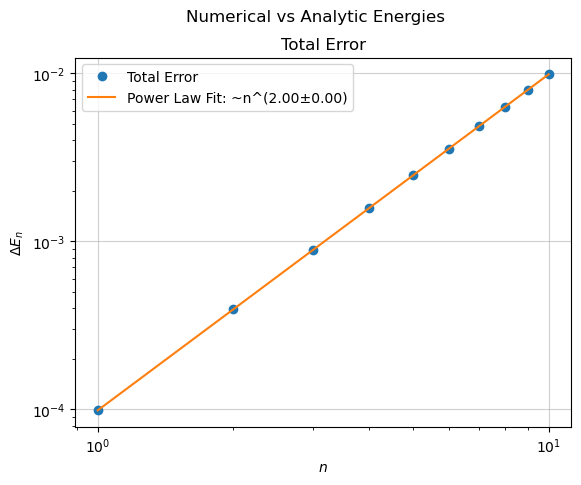

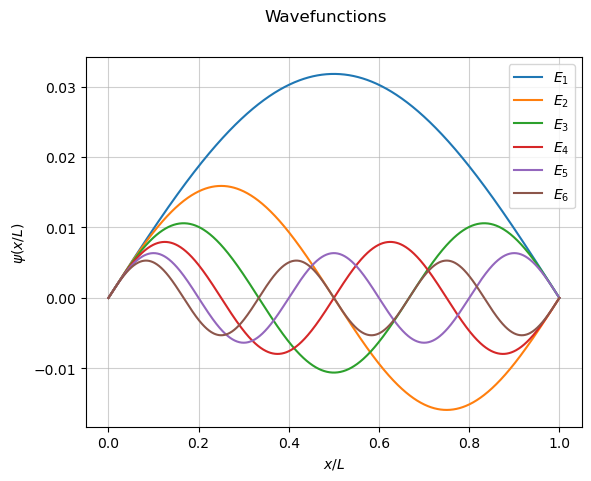

In [15]:
# Error of numerical energies

from scipy.optimize import curve_fit

total_error = energy_final_values - analytic_energies[0]
relative_error = np.abs(total_error)/analytic_energies[0]

def power_law(x, a, b):
    return a*x**b

def error_analysis(analytic_energies_, total_error_, relative_error_, fit_func, function_name='nu'):

    params, covariance = curve_fit(fit_func, analytic_energies_[1], total_error_)
    sigma = np.sqrt(np.diag(covariance))
    x_points = np.linspace(1, 10, 100)


    fig, axs = plt.subplots()
    fig.suptitle('Numerical vs Analytic Energies')

    axs.set_title('Total Error')
    axs.grid(alpha=0.6)
    axs.plot(analytic_energies_[1], total_error_, 'o', label='Total Error')
    axs.plot(x_points, power_law(x_points, *params), label=f'Power Law Fit: ~n^({params[1]:.2f}±{sigma[1]:.2f})')
    axs.set_xlabel('$n$')
    axs.set_ylabel('$\\Delta E_n$')
    axs.legend()
    axs.set_yscale('log')
    axs.set_xscale('log')

    plt.savefig(f'/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/energy_error_{function_name}.pdf')
    plt.show()
    plt.close()

error_analysis(analytic_energies, total_error, relative_error, power_law)

def plot_wavefunctions(energy_final_values_, nu_, xtilde_vals_, N_, GammaSquare_, function_name='nu'):
    fig, axs = plt.subplots()
    fig.suptitle('Wavefunctions')

    for i in range(6):
        Psi = np.zeros(N)
        Psi = analysis_no_plot(Psi, energy_final_values_[i], nu_, xtilde_vals_, N_, GammaSquare_)
        axs.plot(xtilde_vals_, Psi, label=f'$E_{i+1}$')
    axs.set_xlabel('$x/L$')
    axs.set_ylabel('$\\psi(x/L)$')
    axs.legend()
    axs.grid(alpha=0.6)

    plt.savefig(f'/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/wavefunctions_{function_name}.pdf')
    plt.show()
    plt.close()

plot_wavefunctions(energy_final_values, nu, xtilde_vals, N, GammaSquare)
    

<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_32428/3126047155.py:34: SyntaxWarning: invalid escape sequence '\p'
  axs.set_ylabel('$\psi(x/L)$')


Energy 0 correct.
Normalisation succesful for $E_1$
Energy 1 correct.
Normalisation succesful for $E_2$
Energy 2 correct.
Normalisation succesful for $E_3$
Energy 3 correct.
Normalisation succesful for $E_4$
Energy 4 correct.
Normalisation succesful for $E_5$
Energy 5 correct.
Normalisation succesful for $E_6$


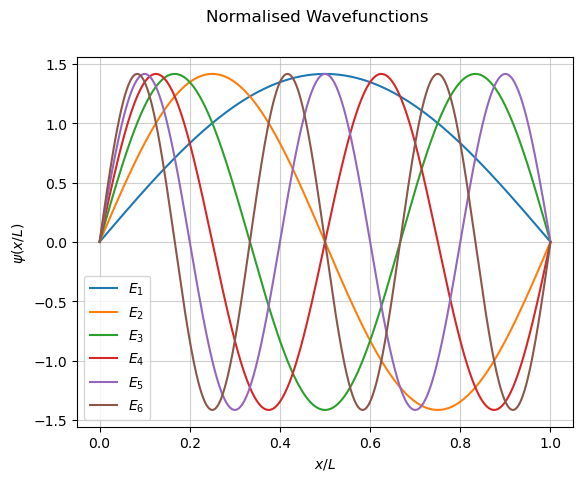

In [16]:
# Normalisation


def normalised_wavefunction(Psi_, N_):
    if np.isclose(simps(Psi_**2, dx=1/N_), 1, atol=1E-2):
        print('Already normalised')
    else:
        Int_of_Psi_square = simps(Psi_**2, dx=1/N_)
        return Psi_/(Int_of_Psi_square**0.5)

def plot_normalised_wavefunctions(energy_final_values_, nu_, xtilde_vals_, N_, GammaSquare_, function_name='nu'):
    fig, axs = plt.subplots()
    fig.suptitle('Normalised Wavefunctions')

    for i in range(6):
        Psi = np.zeros(N)
        Psi = analysis_no_plot(Psi, energy_final_values_[i], nu_, xtilde_vals_, N_, GammaSquare_)
            
        normal_Psi = normalised_wavefunction(Psi, N_)
        if np.isclose(Psi[-1], 0, atol=1E-2):
            print(f'Energy {i} correct.')
            axs.plot(xtilde_vals_, normal_Psi, label=f'$E_{i+1}$')
        else:
            print(f'Energy {i} not correct.')
    
        # Check normalisation
        
        if np.isclose(simps(normal_Psi**2, dx=1/N), 1, atol=1E-3):
            print(f'Normalisation succesful for $E_{i+1}$')
        else:
            print(f'Normalisation failed for $E_{i+1}$')

    axs.set_xlabel('$x/L$')
    axs.set_ylabel('$\psi(x/L)$')
    axs.legend()
    axs.grid(alpha=0.6) 

    plt.savefig(f'/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/Normalised Wavefunctions_{function_name}.pdf')
    plt.show()
    plt.close()

plot_normalised_wavefunctions(energy_final_values, nu, xtilde_vals, N, GammaSquare)



 Uncertainty in x: 0.18015256372003094 
 Uncertainty in p: 3.145085794999902 
 Uncertainty principle: 0.566595269088684 ≳ 0.5
Uncertainty principle satisfied for E_-0.9505531337098408
Uncertainty principle satisfied for E_-0.8022125348373652
Uncertainty principle satisfied for E_-0.5549782033932296
Uncertainty principle satisfied for E_-0.20885013942339917
Uncertainty principle satisfied for E_0.23617165696421244
Uncertainty principle satisfied for E_0.7800871855411234
Uncertainty principle satisfied for E_1.422896445895661
Uncertainty principle satisfied for E_2.1645994373523663
Uncertainty principle satisfied for E_3.0051961588753997
Uncertainty principle satisfied for E_3.9446866089659647
[0.56659527 1.67001874 2.62720018 3.55818509 4.47933684 5.39569332
 6.30934359 7.22131424 8.13216968 9.04224623]


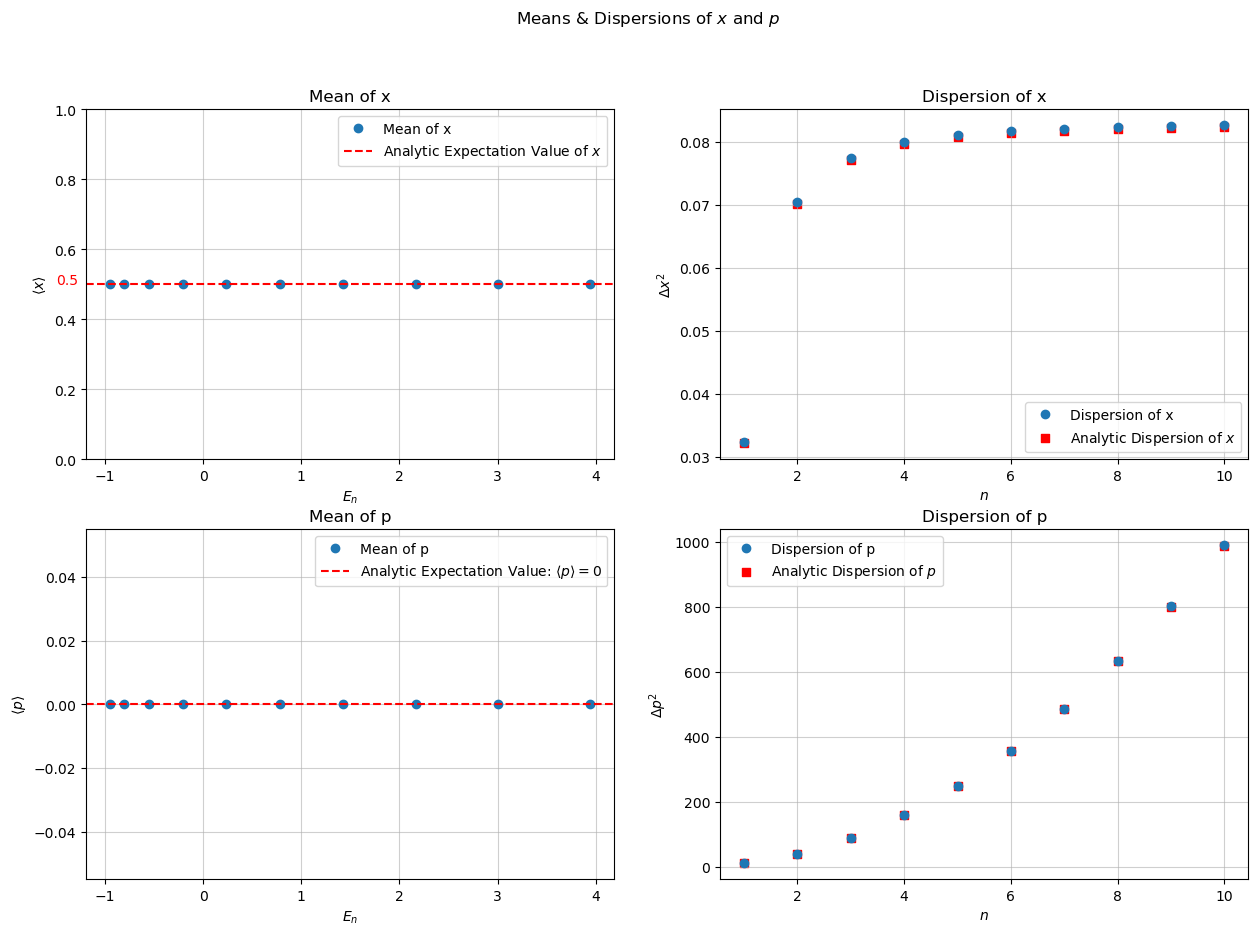

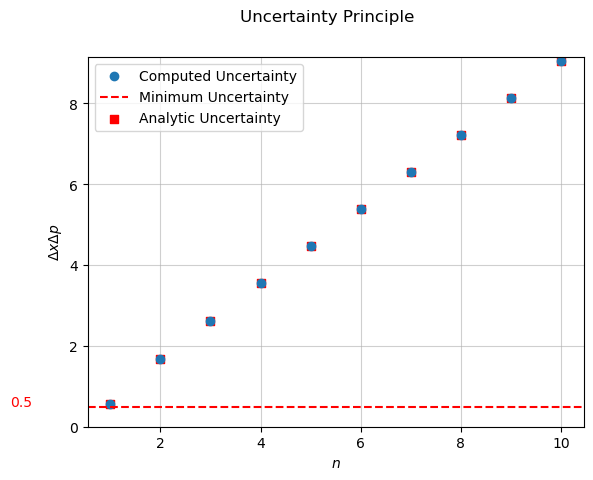

[0.56659527 1.67001874 2.62720018 3.55818509 4.47933684 5.39569332
 6.30934359 7.22131424 8.13216968 9.04224623]


In [17]:
# Uncertainty
Psi = np.zeros(N)
Psi = analysis_no_plot(Psi, energy_final_values[0], nu, xtilde_vals, N, GammaSquare)
Psi = normalised_wavefunction(Psi, N)

def expectation_value_moment(Psi_, xtilde_vals_, N_, n):
    return simps((Psi_ **2) * (xtilde_vals_**n), xtilde_vals_, dx=1/N_)


def dispersion_x(Psi_, xtilde_vals_, N_):
    return expectation_value_moment(Psi_, xtilde_vals_, N_, 2) - expectation_value_moment(Psi_, xtilde_vals_, N_, 1)**2


def five_point_central_difference_method(Psi_, N_):
    dpsidx = np.zeros(N_)
    h = 1/N_
    dpsidx[0] = (Psi_[1] - Psi_[0])/h
    dpsidx[1] = (Psi_[2] - Psi_[0])/(2*h)
    for i in range(2, N_-3):
        dpsidx[i] = (8*Psi_[i+1] - 8*Psi_[i-1] - Psi_[i+2] + Psi_[i-2])/(12*h)
    dpsidx[-2] = (Psi_[-1] - Psi_[-3])/(2*h)
    dpsidx[-1] = (Psi_[-1] - Psi_[-2])/h
    return dpsidx


def expectation_value_p(Psi_, xtilde_vals_, N_):
    q = 0 - 1j
    dPsidx = five_point_central_difference_method(Psi_, N_)
    expec_p = q*simps(Psi_*dPsidx, xtilde_vals_, dx=1/N_)
    if np.isclose(expec_p.imag, 0, atol=1E-2):
        expec_p = 0
    return expec_p


def expectation_value_p_squared(Psi_, xtilde_vals_, N_):
    dPsidx = five_point_central_difference_method(Psi_, N_)
    d2Psidx2 = five_point_central_difference_method(dPsidx, N_)
    return -simps(Psi_*d2Psidx2, xtilde_vals_, dx=1/N_)

def dispersion_p(Psi_, xtilde_vals_, N_):
    return expectation_value_p_squared(Psi_, xtilde_vals_, N_) - expectation_value_p(Psi_, xtilde_vals_, N_)**2

# print(expectation_value_moment(Psi, xtilde_vals, N, 1))
# print(expectation_value_moment(Psi, xtilde_vals, N, 2))
# print(dispersion_x(Psi, xtilde_vals, N))
# print(expectation_value_p(Psi, xtilde_vals, N))
# print(expectation_value_p_squared(Psi, xtilde_vals, N))
# print(dispersion_p(Psi, xtilde_vals, N))

print(' Uncertainty in x:', np.sqrt(dispersion_x(Psi, xtilde_vals, N)), '\n',
      'Uncertainty in p:', np.sqrt(dispersion_p(Psi, xtilde_vals, N)), '\n',
      'Uncertainty principle:', np.sqrt(dispersion_x(Psi, xtilde_vals, N)*dispersion_p(Psi, xtilde_vals, N)), '≳', 0.5)

def uncertainty_principle_check_and_plot(energies, nu_, xtilde_vals_, N_, GammaSquare_, function_name='nu'):
    expec_p = np.zeros(len(energies))
    expec_p_squared = np.zeros(len(energies))
    disp_p = np.zeros(len(energies))
    expec_x = np.zeros(len(energies))
    expec_x_squared = np.zeros(len(energies))
    disp_x = np.zeros(len(energies))
    
    for i, energy in enumerate(energies):
        Psi = np.zeros(N_)
        Psi = analysis_no_plot(Psi, energy, nu_, xtilde_vals_, N_, GammaSquare_)
        Psi = normalised_wavefunction(Psi, N_)

        expec_x[i] = expectation_value_moment(Psi, xtilde_vals_, N_, 1)
        expec_x_squared[i] = expectation_value_moment(Psi, xtilde_vals_, N_, 2)
        disp_x[i] = dispersion_x(Psi, xtilde_vals_, N_)
        expec_p_squared[i] = expectation_value_p_squared(Psi, xtilde_vals_, N_)
        disp_p[i] = dispersion_p(Psi, xtilde_vals_, N_)

        uncertainty_principle = np.sqrt(disp_x*disp_p)
        
        if  uncertainty_principle[i] >= 0.5:
            print(f'Uncertainty principle satisfied for E_{energy}')
        else:
            print(f'Uncertainty principle not satisfied for E_{energy}')
    print(uncertainty_principle)

    # Means, Dispersions.
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Means & Dispersions of $x$ and $p$')

    axs[0,0].set_title('Mean of x')
    axs[0,0].grid(alpha=0.6)
    axs[0,0].plot(energies, expec_x, 'o', label='Mean of x')
    axs[0,0].set_xlabel('$E_n$')
    axs[0,0].set_ylabel('$\\langle x \\rangle$')
    axs[0,0].set_ylim(0, 1)
    axs[0,0].axhline(0.5, color='r', linestyle='--', label='Analytic Expectation Value of $x$')
    axs[0,0].text(-1.5, 0.5, 0.5, color='r')
    axs[0,0].legend()

    n_vals = np.arange(1,len(energies)+1)
    axs[0,1].set_title('Dispersion of x')
    axs[0,1].grid(alpha=0.6)
    axs[0,1].plot(n_vals, disp_x,'o', label='Dispersion of x')
    axs[0,1].set_xlabel('$n$')
    axs[0,1].set_ylabel('$\\Delta x^2$')
    if nu_ == nu:
        axs[0,1].scatter(n_vals, 1/3 - 1/(2*(n_vals*np.pi)**2) - expec_x**2, marker='s', color='red', label='Analytic Dispersion of $x$')
    else:
        print('No analytic solutions for this potential.')
    axs[0,1].legend()

    axs[1,0].set_title('Mean of p')
    axs[1,0].grid(alpha=0.6)
    axs[1,0].plot(energies, expec_p, 'o', label='Mean of p')
    axs[1,0].set_xlabel('$E_n$')
    axs[1,0].set_ylabel('$\\langle p \\rangle$')
    axs[1,0].axhline(0, color='r', linestyle='--', label='Analytic Expectation Value: $\\langle p \\rangle = 0$')
    axs[1,0].legend()

    axs[1,1].set_title('Dispersion of p')
    axs[1,1].grid(alpha=0.6)
    axs[1,1].plot(n_vals, disp_p, 'o', label='Dispersion of p')
    axs[1,1].set_xlabel('$n$')
    axs[1,1].set_ylabel('$\\Delta p^2$')
    if nu_ == nu:
        axs[1,1].scatter(n_vals, n_vals**2*np.pi**2, marker='s', color='red', label='Analytic Dispersion of $p$')
    else:
        print('No analytic solutions for this potential.')
    axs[1,1].legend()

    plt.savefig(f'/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/means_and_dispersions_for_{function_name}.pdf')
    plt.show()
    plt.close()


    # Uncertainty Principle.
    fig, axs = plt.subplots()
    fig.suptitle('Uncertainty Principle')

    axs.grid(alpha=0.6)
    axs.plot(n_vals, uncertainty_principle, 'o', label='Computed Uncertainty')
    axs.set_xlabel('$n$')
    axs.set_ylabel('$\\Delta x \\Delta p$')
    axs.set_ylim(0, max(uncertainty_principle)+0.1)
    axs.axhline(0.5, color='r', linestyle='--', label='Minimum Uncertainty')
    if nu_ == nu:
        axs.scatter(n_vals, np.sqrt((n_vals**2*np.pi**2-6)/12), marker='s', color='red', label='Analytic Uncertainty')
    axs.text(-1, 0.5, 0.5, color='r')
    axs.legend()

    plt.savefig(f'/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/uncertainty_principle_for_{function_name}.pdf')
    plt.show()
    plt.close()

    print(uncertainty_principle)



uncertainty_principle_check_and_plot(energy_final_values, nu, xtilde_vals, N, GammaSquare)






In [18]:
def harmonic_nu(x):
    return 8*(x-0.5)**2 - 1

GammaSquare2 = 1000

# energy_starting_values2 = np.linspace(-0.99,5,40)

# energy_final_values2 = np.zeros(len(energy_starting_values2))
# for i in range(len(energy_starting_values2)):
#     possible_E_val = Shooting_method(energy_starting_values2[i], harmonic_nu, xtilde_vals, N, GammaSquare2)
#     if np.isclose(possible_E_val, energy_final_values2[i-1], atol=1E-3):
#         energy_final_values2[i] =  0
#     else:
#         energy_final_values2[i] = possible_E_val
#     print(f'Iteration {i} complete')
# energy_final_values2 = energy_final_values2[energy_final_values2!=0]
# print(energy_final_values2)

energy_starting_values2 =  -0.99
num_energies = 20


energy_final_values2 = np.zeros(num_energies)
for i in range(num_energies):
    possible_E_val = Shooting_method(energy_starting_values2, harmonic_nu, xtilde_vals, N, GammaSquare2)
    energy_starting_values2 = possible_E_val + 0.01
    energy_final_values2[i] = possible_E_val
    print(f'Iteration {i} complete')

energy_final_values2 = energy_final_values2[energy_final_values2!=0]
print(energy_final_values2)




Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
Iteration 10 complete
Iteration 11 complete
Iteration 12 complete
Iteration 13 complete
Iteration 14 complete
Iteration 15 complete
Iteration 16 complete
Iteration 17 complete
Iteration 18 complete
Iteration 19 complete
[-0.91046775 -0.73140324 -0.55233858 -0.37327221 -0.19419151 -0.01502297
  0.16455074  0.34554285  0.53031146  0.72279809  0.92770821  1.1490852
  1.38947725  1.65007784  1.93127455  2.23309472  2.55544184  2.89819449
  3.2612406   3.64448625]


Energy 0 correct.
Normalisation succesful for $E_1$
Energy 1 correct.
Normalisation succesful for $E_2$
Energy 2 correct.
Normalisation succesful for $E_3$
Energy 3 correct.
Normalisation succesful for $E_4$
Energy 4 correct.
Normalisation succesful for $E_5$
Energy 5 correct.
Normalisation succesful for $E_6$


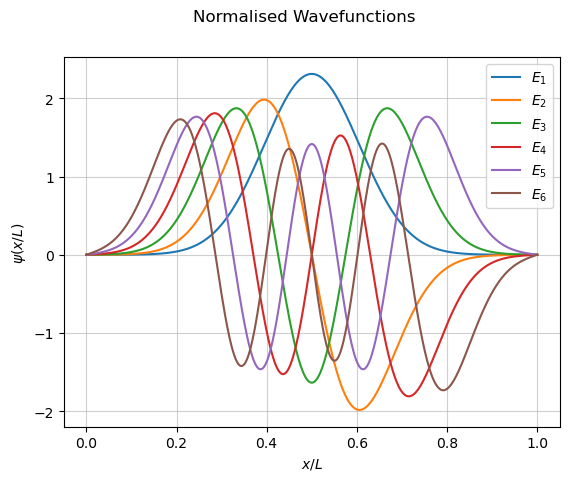

Uncertainty principle not satisfied for E_-0.9104677484687809
Uncertainty principle satisfied for E_-0.731403238100578
Uncertainty principle satisfied for E_-0.5523385840923345
Uncertainty principle satisfied for E_-0.3732722115356567
Uncertainty principle satisfied for E_-0.19419150643522098
Uncertainty principle satisfied for E_-0.01502297141593283
Uncertainty principle satisfied for E_0.16455074468400802
Uncertainty principle satisfied for E_0.3455428526235181
Uncertainty principle satisfied for E_0.5303114598566804
Uncertainty principle satisfied for E_0.7227980949996227
Uncertainty principle satisfied for E_0.9277082089364236
Uncertainty principle satisfied for E_1.149085196945334
Uncertainty principle satisfied for E_1.389477248168283
Uncertainty principle satisfied for E_1.6500778403285177
Uncertainty principle satisfied for E_1.9312745481375686
Uncertainty principle satisfied for E_2.233094717768623
Uncertainty principle satisfied for E_2.555441840809005
Uncertainty principle s

/tmp/ipykernel_32428/390828541.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  disp_p[i] = dispersion_p(Psi, xtilde_vals_, N_)


No analytic solutions for this potential.
No analytic solutions for this potential.


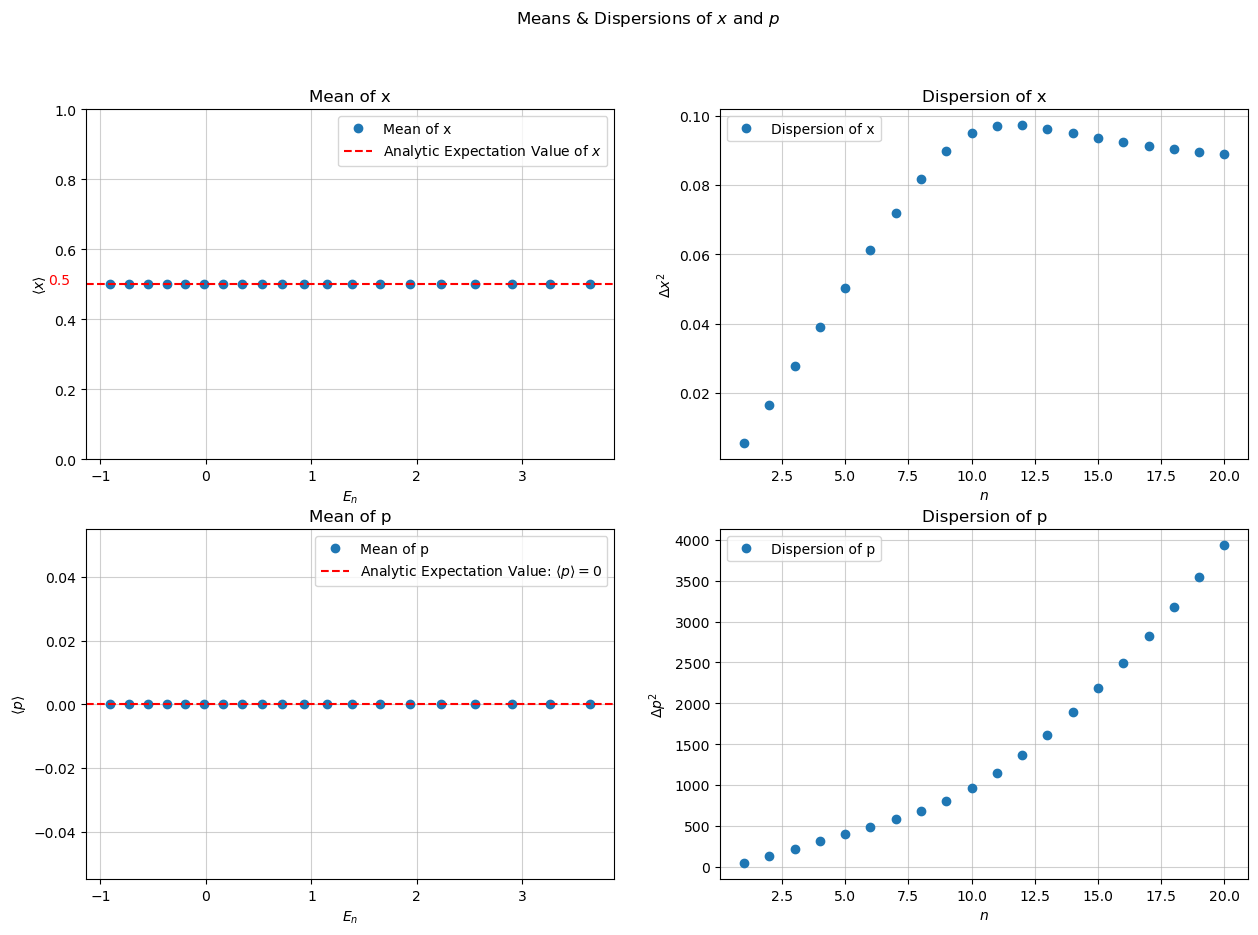

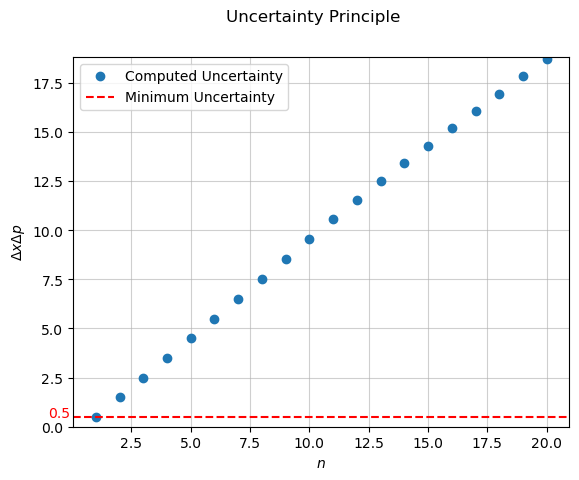

[ 0.48967064  1.49175974  2.4937804   3.49580032  4.49789274  5.50044554
  6.50502016  7.51555878  8.53617276  9.56144477 10.57160368 11.54754477
 12.48619818 13.39693646 14.29108531 15.17686389 16.05912643 16.94047046
 17.82220979 18.70497127]


In [19]:

plot_normalised_wavefunctions(energy_final_values2, harmonic_nu, xtilde_vals, N, GammaSquare2, function_name='harmonic_nu')

uncertainty_principle_check_and_plot(energy_final_values2, harmonic_nu, xtilde_vals, N, GammaSquare2, function_name='harmonic_nu')


[0.17906451036820292, 0.17906465400824345, 0.1790663725566778, 0.17908070510043572, 0.17916853501928814, 0.17957371609994086, 0.18099210793951007, 0.1847686072331623, 0.1924866351429423, 0.20491011393680092, 0.22137698800891037, 0.24039205122294915, 0.26060059216023457, 0.2811967078090509, 0.3018201696310545, 0.32234712304038204, 0.342752645134333, 0.3630461184120968, 0.38324564462766864]


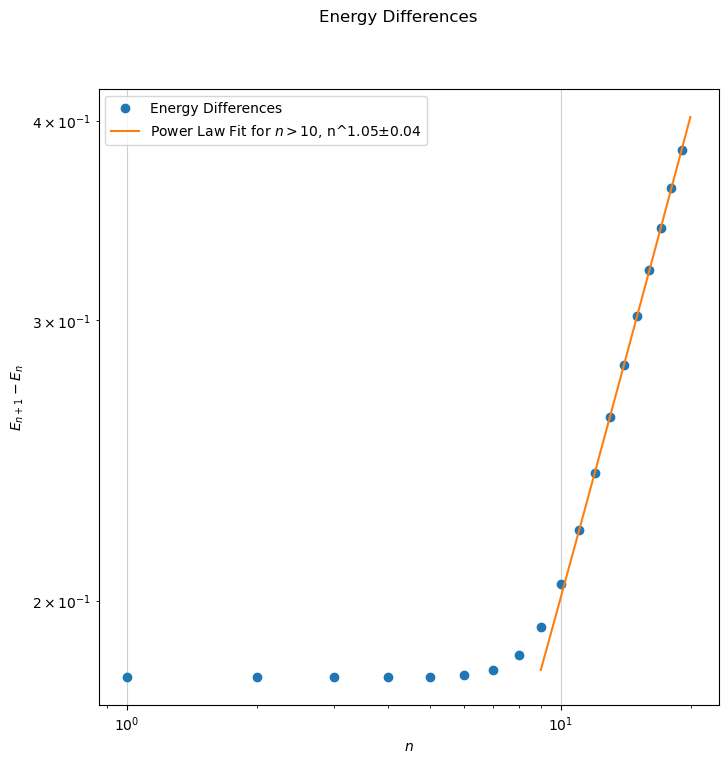

In [20]:
from scipy.optimize import curve_fit

def power_law(x, a, b, c):
    return a*(x-c)**b

diff_list = []
for i in range(num_energies-1):
    diff_list.append(energy_final_values2[i+1] - energy_final_values2[i])

print(diff_list)

fig, axs = plt.subplots(figsize=(8,8))
fig.suptitle('Energy Differences')

n_vals = np.arange(1, num_energies)
fit_vals = np.arange(n_vals[8], num_energies, 0.1)

params, covar = curve_fit(power_law, n_vals[10:], diff_list[10:])

axs.plot(n_vals, diff_list, 'o', label='Energy Differences')
axs.plot(fit_vals, power_law(fit_vals, *params), label=f'Power Law Fit for $n>10$, n^{params[1]:.2f}±{np.sqrt(covar[1,1]):.2f}')
axs.set_xlabel('$n$')
axs.set_ylabel('$E_{n+1} - E_n$')
axs.legend()
axs.set_xscale('log')
axs.set_yscale('log')
axs.grid(alpha=0.6)

plt.savefig('/home/dj-lawton/Documents/Junior Sophister/JS Labs/Comp Lab/energy_diffs_harmonic_nu.pdf')

plt.show()
plt.close()

